In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.initializers import Ones
from keras.initializers import Zeros
from keras.initializers import Constant
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data


Using TensorFlow backend.


In [0]:
import tensorflow as tf

In [0]:
mnist = input_data.read_data_sets("/tmp/mnist" , one_hot = True)

W0814 08:22:11.945292 140447725758336 deprecation.py:323] From <ipython-input-3-1ab8bd4f905e>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0814 08:22:11.946935 140447725758336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0814 08:22:11.948322 140447725758336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/mnist/train-images-idx3-ubyte.gz


W0814 08:22:12.849281 140447725758336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0814 08:22:12.851626 140447725758336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/mnist/t10k-images-idx3-ubyte.gz


W0814 08:22:13.223212 140447725758336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/mnist/t10k-labels-idx1-ubyte.gz


In [0]:
xtrain , xtest = mnist.train.images , mnist.train.images

In [0]:
 xtrain = xtrain.reshape((-1,28*28))
 xtest = xtest.reshape((-1,28*28))
xtrain.shape
 

(55000, 784)

In [0]:
model = Sequential()
model.add(Dense ( 256  , activation = 'relu' , kernel_initializer = 'random_uniform', input_shape = (784,)  ))
model.add(Dense(128 , activation = 'relu' , kernel_initializer = 'random_uniform'))
model.add(Dense (64  , activation = 'relu' , kernel_initializer = 'random_uniform' )) 
model.add(Dense(128 , activation = 'relu' , kernel_initializer = 'random_uniform'))
model.add(Dense ( 256  , activation = 'relu' , kernel_initializer = 'random_uniform' ))
model.add(Dense(784 , activation = 'sigmoid' , kernel_initializer='random_uniform'))



W0814 08:22:13.546362 140447725758336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 08:22:13.548232 140447725758336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 08:22:13.559037 140447725758336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.summary()
model.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['accuracy'])
model.fit(x=xtrain , y=xtrain , verbose = 2 , epochs = 2)

W0814 08:22:13.640514 140447725758336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 08:22:13.796687 140447725758336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               201488    
Total params: 484,944
Trainable params: 484,944
Non-trainable params: 0
_________________________________________________________________


W0814 08:22:14.127163 140447725758336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/2
 - 11s - loss: 0.0468 - acc: 0.0099
Epoch 2/2
 - 7s - loss: 0.0244 - acc: 0.0098


(112, 112)
Imagen original:


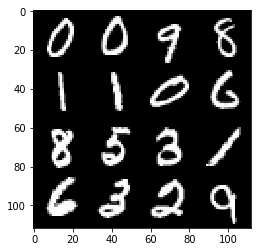

Imagen reconstruida:


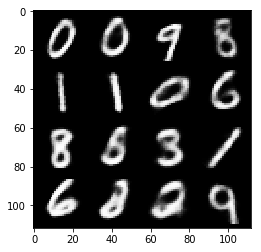

In [0]:
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    batch_x, _ = mnist.test.next_batch(n)
    g = model.predict(batch_x)
    
    for j in range(n):
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
        
    for j in range(n):
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print (canvas_recon.shape)
print("Imagen original:")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Imagen reconstruida:")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()
